/var/folders/st/ng23bqyd59ndbk5_qmpyq8rr0000gn/T/ipykernel_38090/1079414120.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not hasattr(np, "float"):  # NumPy ≥1.20 compatibility


Target GRB_200415A
Running gtselect...
time -p gtselect infile=/Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/L250924144758039FD35863_EV00.fits outfile=/Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/Interval_0_1000/filtered_evts.fits ra=11.888058 dec=-25.2888 rad=12.0 tmin=608633290.0 tmax=608633790.0 emin=100.0 emax=100000.0 zmin=0.0 zmax=100.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.08
user 0.05
sys 0.01
  Selected 11 events
Running gtmktime...
time -p gtmktime scfile=/Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/L250924144758039FD35863_SC00.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=/Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/Interval_0_1000/filtered_evts.fits evtable="EVENTS" outfile="/Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/Interval_0_1000/fil

/Users/salim/anaconda3/envs/fermi_env/lib/python3.9/site-packages/LATSourceModel/SourceList.py:154: UserWarning: Region XML model /Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/Interval_0_1000/model.xml already exists, will be overwritten if you call the make_model method.
  warnings.warn(f'Region XML model {str(self.output_name)} already exists, will be\
/Users/salim/anaconda3/envs/fermi_env/lib/python3.9/site-packages/LATSourceModel/SourceList.py:861: UserWarning: Assuming same save directory as main model.
  warnings.warn('Assuming same save directory as main model.')
/Users/salim/anaconda3/envs/fermi_env/lib/python3.9/site-packages/LATSourceModel/SourceList.py:867: UserWarning: File /Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/Interval_0_1000/model.xml exists, will be overwritten.
  warnings.warn(f'File {str(new_model_name)} exists, will be overwritten.')


adding source gll_iem_v07
adding source iso_P8R3_SOURCE_V3_v1
Working on...
/Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A/Interval_0_1000/filtered_gti.fits...........!
real 1.44
user 1.22
sys 0.21
  Diffuse response calculated
  Initial -logL: 118.02
  TS = -0.00, Flux = 1.11e-08
0 11.102479362923301 -0.0004887060392206877 1.110698345218543e-08
1 220.65726924370296 0.014526975641530271 2.2074678618892956e-07
2 430.2120591244826 0.029740038797257284 4.3038658892567375e-07
3 639.7668490052622 0.04498729140333069 6.400263916624181e-07
4 849.3216388860419 0.06028565435060784 8.496661943991624e-07
5 16914.710969971617 6.224856027174198 1.6921572983902156e-05

 Upperlimits using UpperLimits code 4.23e-06 ph/cm^2/s for emin=100.0, emax=100000.0, delta(logLike)=1.35

Performing profile likelihood scan...
  Null logL = -104.18
    1/151  F=0.00e+00  TS=0.00
    26/151  F=1.94e-10  TS=0.00
    51/151  F=4.27e-09  TS=-0.00
    76/151  F=9.40e-08  TS=-0.02
    101/151  F=2.07e

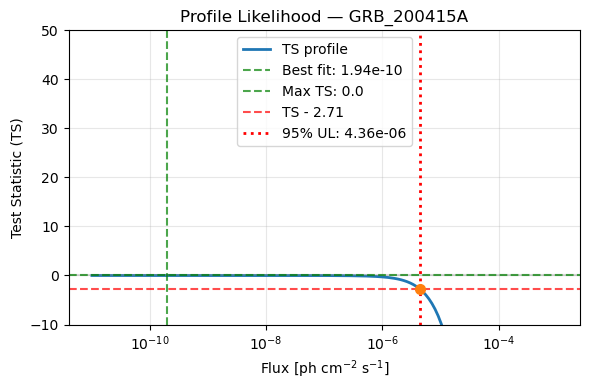

In [1]:
#!/usr/bin/env python
"""
Fermi LAT Single Event Profile Likelihood Analysis
Unified clean baseline combining stable + improved code
"""

# ============================================================================
# IMPORTS
# ============================================================================
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
import gt_apps as my_apps
from UnbinnedAnalysis import UnbinnedObs, UnbinnedAnalysis
from LATSourceModel import SourceList
from UpperLimits import UpperLimits
if not hasattr(np, "float"):  # NumPy ≥1.20 compatibility
    np.float = float

# ============================================================================
# CONFIGURATION
# ============================================================================
T0 = 608633290

TARGET = {
    'name': 'GRB_200415A',
    'ra': 11.888058,
    'dec': -25.288800,
    'tmin': T0,
    'tmax': T0+500,
}

ANALYSIS = {
    'roi': 12.0,
    'emin': 100.0,       # MeV
    'emax': 100000.0,    # MeV
    'zmax': 100.0,
    'evclass': 8,
    'evtype': 3,
    'irfs': 'P8R3_TRANSIENT020E_V3',
    'spectral_index': -2.0,
}

BASE_DIR = Path("/Users/salim/Desktop/MGFs_LAT/MGF_LAT_analysis_trigger/GRB_200415A")
WORK_DIR = BASE_DIR / "Interval_0_1000"
DATA_DIR = BASE_DIR

PH_FILE = DATA_DIR / "L250924144758039FD35863_EV00.fits"
SC_FILE = DATA_DIR / "L250924144758039FD35863_SC00.fits"



OUTPUT_FILES = {
    'filtered': WORK_DIR / "filtered_evts.fits",
    'gti': WORK_DIR / "filtered_gti.fits",
    'ltcube': WORK_DIR / "ltcube.fits",
    'expmap': WORK_DIR / "expmap.fits",
    'model': WORK_DIR / "model.xml",
    'profile': WORK_DIR / "profile_single.npz",
}

FERMI_DIR = Path(os.environ["FERMI_DIR"])
DIFFUSE_FILES = {
    'galactic': FERMI_DIR / "refdata/fermi/galdiffuse/gll_iem_v07.fits",
    'isotropic': FERMI_DIR / "refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt",
    'catalog': BASE_DIR / "../gll_psc_v35.fit",
}

PROFILE_CONFIG = {
    'flux_grid': np.concatenate(([0.0], np.logspace(-11, -3, 150))),
    'delta_chi2_95': 2.71,
}
# ============================================================================
# DATA REDUCTION
# ============================================================================
def run_gtselect():
    print("Running gtselect...")
    my_apps.filter['infile']  = str(PH_FILE)
    my_apps.filter['outfile'] = str(OUTPUT_FILES['filtered'])
    my_apps.filter['ra']      = TARGET['ra']
    my_apps.filter['dec']     = TARGET['dec']
    my_apps.filter['rad']     = ANALYSIS['roi']
    my_apps.filter['tmin']    = TARGET['tmin']
    my_apps.filter['tmax']    = TARGET['tmax']
    my_apps.filter['emin']    = ANALYSIS['emin']
    my_apps.filter['emax']    = ANALYSIS['emax']
    my_apps.filter['zmax']    = ANALYSIS['zmax']
    my_apps.filter['evclass'] = ANALYSIS['evclass']
    my_apps.filter['evtype']  = ANALYSIS['evtype']
    my_apps.filter.run()
    with fits.open(OUTPUT_FILES['filtered']) as hdul:
        n_events = len(hdul["EVENTS"].data)
    print(f"  Selected {n_events} events")
    return n_events

def run_gtmktime():
    print("Running gtmktime...")
    my_apps.maketime['scfile']  = str(SC_FILE)
    my_apps.maketime['filter']  = "(DATA_QUAL>0)&&(LAT_CONFIG==1)"
    my_apps.maketime['roicut']  = "no"
    my_apps.maketime['evfile']  = str(OUTPUT_FILES['filtered'])
    my_apps.maketime['outfile'] = str(OUTPUT_FILES['gti'])
    my_apps.maketime.run()
    with fits.open(OUTPUT_FILES['gti']) as hdul:
        n_events = len(hdul["EVENTS"].data)
    print(f"  Events after GTI: {n_events}")
    return n_events

def run_gtltcube():
    print("Running gtltcube...")
    my_apps.expCube['evfile']    = str(OUTPUT_FILES['gti'])
    my_apps.expCube['scfile']    = str(SC_FILE)
    my_apps.expCube['outfile']   = str(OUTPUT_FILES['ltcube'])
    my_apps.expCube['dcostheta'] = 0.025
    my_apps.expCube['binsz']     = 1.0
    my_apps.expCube['zmax']      = ANALYSIS['zmax']
    my_apps.expCube.run()
    print("  Livetime cube created")

def run_gtexpmap():
    print("Running gtexpmap...")
    my_apps.expMap['evfile']    = str(OUTPUT_FILES['gti'])
    my_apps.expMap['scfile']    = str(SC_FILE)
    my_apps.expMap['expcube']   = str(OUTPUT_FILES['ltcube'])
    my_apps.expMap['outfile']   = str(OUTPUT_FILES['expmap'])
    my_apps.expMap['irfs']      = ANALYSIS['irfs']
    my_apps.expMap['srcrad']    = ANALYSIS['roi'] + 10.0
    my_apps.expMap['nlong']     = 120
    my_apps.expMap['nlat']      = 120
    my_apps.expMap['nenergies'] = 20
    my_apps.expMap.run()
    print("  Exposure map created")

# ============================================================================
# MODEL
# ============================================================================
def build_model():
    print("Building source model...")
    sl = SourceList(
        catalog_file=DIFFUSE_FILES['catalog'],
        ROI=OUTPUT_FILES['gti'],
        output_name='model.xml',
        write_directory=WORK_DIR
    )
    sl.make_model(
        galactic_file=DIFFUSE_FILES['galactic'],
        isotropic_file=DIFFUSE_FILES['isotropic'],
        free_radius=3,
        sigma_to_free=9,
        norms_free_only=True
    )
    spectrum_info = {
        'model': 'PowerLaw2',
        'Integral': 1e-9,
        'Integral_free': True,
        'Index': ANALYSIS['spectral_index'],
        'Index_free': False,
        'LowerLimit': ANALYSIS['emin'],
        'LowerLimit_free': False,
        'UpperLimit': ANALYSIS['emax'],
        'UpperLimit_free': False,
    }
    sl.add_point_source(
        'FXT_transient',
        RA=TARGET['ra'], DEC=TARGET['dec'],
        spectrum_model=spectrum_info,
        new_model_name='model.xml',
        overwrite=True,
        update_reg=True
    )
    print(f"  Model saved to {OUTPUT_FILES['model']}")
    return OUTPUT_FILES['model']

def run_gtdiffrsp():
    print("Running gtdiffrsp...")
    my_apps.diffResps['evfile'] = str(OUTPUT_FILES['gti'])
    my_apps.diffResps['scfile'] = str(SC_FILE)
    my_apps.diffResps['srcmdl'] = str(OUTPUT_FILES['model'])
    my_apps.diffResps['irfs']   = ANALYSIS['irfs']
    my_apps.diffResps.run()
    print("  Diffuse response calculated")

# ============================================================================
# LIKELIHOOD
# ============================================================================
def setup_likelihood():
    obs = UnbinnedObs(
        str(OUTPUT_FILES['gti']), str(SC_FILE),
        expMap=str(OUTPUT_FILES['expmap']),
        expCube=str(OUTPUT_FILES['ltcube']),
        irfs=ANALYSIS['irfs']
    )
    like = UnbinnedAnalysis(obs, srcModel=str(OUTPUT_FILES['model']), optimizer="NEWMINUIT")
    print(f"  Initial -logL: {float(like()):.2f}")
    return like

def fit_likelihood(like):
    like.fit(verbosity=0, covar=True)
    ts = like.Ts("FXT_transient")
    flux = like.flux("FXT_transient", emin=ANALYSIS['emin'], emax=ANALYSIS['emax'])
    print(f"  TS = {ts:.2f}, Flux = {flux:.2e}")
    return ts, flux


def fit_likelihood(like):
    """Try NEWMINUIT with covar=True, then covar=False. If both fail, log and continue."""
    try:
        like.fit(verbosity=0, optimizer="NEWMINUIT", covar=True)
    except Exception as e1:
        print("\n  [Warning] fit(covar=True) failed:", e1)
        print("  -> retry with covar=False")
        try:
            like.fit(verbosity=0, optimizer="NEWMINUIT", covar=False)
        except Exception as e2:
            # Log and soft-fail (do not stop the run)
            msg = f"{TARGET.get('name','UNKNOWN')}\tNEWMINUIT fit_likelihood failed: {e2}"
            print("[Exclude]", msg)
            try:
                with open(FAIL_LOG, "a") as f:
                    f.write(msg + "\n")
            except Exception:
                pass
            # Return NaNs so caller can keep going
            return np.nan, np.nan

    # If we’re here, fit succeeded; compute TS and flux safely
    try:
        ts = like.Ts("FXT_transient")
    except Exception:
        ts = np.nan
    try:
        flux = like.flux("FXT_transient", emin=ANALYSIS['emin'], emax=ANALYSIS['emax'])
    except Exception:
        flux = np.nan

    print(f"  TS = {ts if np.isfinite(ts) else 0:.2f}, "
          f"Flux = {flux if np.isfinite(flux) else 0.0:.2e}")
    return ts, flux



# ============================================================================
# PROFILE LIKELIHOOD HELPERS (stacking-style behavior)
# ============================================================================
def _freeze_all_params(like):
    """Freeze EVERY parameter by global index (avoids name->None issues)."""
    npars = len(like.model.params)
    for k in range(npars):
        try:
            like.freeze(k)
        except Exception:
            pass

def _free_diffuse_norms(like):
    """Free ONLY the normalization (and gal. index if present) of diffuse comps."""
    for s in like.sourceNames():
        sl = s.lower()
        if ('iso' in sl) or ('gll_iem' in sl) or ('gal' in sl):
            try:
                spec = like.model[s].funcs['Spectrum']
            except Exception:
                continue
            freed = False
            for pname in ('Prefactor', 'Normalization', 'Value', 'norm'):
                try:
                    spec.getParam(pname).setFree(True)
                    freed = True
                    break
                except Exception:
                    continue
            # also free the Galactic diffuse spectral index if it exists
            try:
                spec.getParam('Index').setFree(True)
            except Exception:
                pass
    like.syncSrcParams()

def _prepare_transient_pl2(like, src='FXT_transient'):
    """Ensure PL2 shape is fixed; Integral allowed to be set to 0."""
    spec = like.model[src].funcs['Spectrum']
    # fix shape params
    for nm in ('Index', 'LowerLimit', 'UpperLimit'):
        try:
            spec.getParam(nm).setFree(False)
        except Exception:
            pass
    # allow Integral to hit zero and keep it fixed per scan step
    P = spec.getParam('Integral')
    lo, hi = P.getBounds()
    if lo != 0.0:
        try:
            P.setBounds(0.0, hi)
        except Exception:
            pass
    P.setFree(False)
    like.syncSrcParams(src)

def _set_flux(like, flux, src='FXT_transient'):
    """Set PL2 Integral to a physical flux value and keep it fixed."""
    spec = like.model[src].funcs['Spectrum']
    P = spec.getParam('Integral')
    sc = P.getScale() or 1.0
    P.setValue(max(0.0, float(flux)) / sc)
    P.setFree(False)
    like.syncSrcParams(src)

# ============================================================================
# PROFILE LIKELIHOOD
# ============================================================================
def prepare_for_profile(like):
    """Stacking-style setup: freeze everything; free diffuse norms only."""
    _freeze_all_params(like)
    _free_diffuse_norms(like)
    _prepare_transient_pl2(like, 'FXT_transient')

def profile_likelihood_scan(like, flux_grid=None):
    if flux_grid is None:
        flux_grid = PROFILE_CONFIG['flux_grid']

    print("\nPerforming profile likelihood scan...")
    prepare_for_profile(like)

    # Null hypothesis
    _set_flux(like, 0.0)
    like.fit(verbosity=0, covar=False)     # use fit() in the loop as requested
    logL0 = -float(like())
    print(f"  Null logL = {logL0:.2f}")

    # Scan
    logL = np.zeros_like(flux_grid, dtype=float)
    for i, F in enumerate(flux_grid):
        _set_flux(like, F)
        try:
            like.fit(verbosity=0, covar=False)
            logL[i] = -float(like())
        except Exception as e:
            print(f"  Warning at F={F:.2e}: {e}")
            logL[i] = np.nan
        if i % 25 == 0:
            ts_here = 2.0 * (logL[i] - logL0) if not np.isnan(logL[i]) else np.nan
            print(f"    {i+1}/{len(flux_grid)}  F={F:.2e}  TS={ts_here:.2f}")
    return flux_grid, logL, logL0



def profile_likelihood_scan(like, flux_grid=None):
    if flux_grid is None:
        flux_grid = PROFILE_CONFIG['flux_grid']

    print("\nPerforming profile likelihood scan...")
    prepare_for_profile(like)

    # --- paths / tags for minimal inline logging (no new functions)
    fail_log = BASE_DIR / "failed_events.txt"
    tag = TARGET.get('name', 'UNKNOWN')

    # ---- Null hypothesis
    _set_flux(like, 0.0)
    try:
        like.fit(verbosity=0, optimizer="NEWMINUIT", covar=False)
        logL0 = -float(like())
        print(f"  Null logL = {logL0:.2f}")
    except Exception as e:
        msg = f"{tag}\tNEWMINUIT null-fit failed: {e}"
        print("[Exclude]", msg)
        try:
            with open(fail_log, "a") as f:
                f.write(msg + "\n")
        except Exception:
            pass
        # Return arrays so caller can proceed gracefully
        return flux_grid, np.full_like(flux_grid, np.nan, dtype=float), np.nan

    # ---- Scan
    logL = np.zeros_like(flux_grid, dtype=float)
    n_ok = 0
    for i, F in enumerate(flux_grid):
        _set_flux(like, F)
        try:
            like.fit(verbosity=0, optimizer="NEWMINUIT", covar=False)
            logL[i] = -float(like())
            n_ok += 1
        except Exception as e:
            print(f"  Warning @ F={F:.2e}: {e}")
            logL[i] = np.nan

        if i % 25 == 0:
            ts_here = 2.0 * (logL[i] - logL0) if np.isfinite(logL[i]) else np.nan
            print(f"    {i+1}/{len(flux_grid)}  F={F:.2e}  TS={ts_here:.2f}")

    if n_ok == 0:
        msg = f"{tag}\tall scan points failed (NEWMINUIT)"
        print("[Exclude]", msg)
        try:
            with open(fail_log, "a") as f:
                f.write(msg + "\n")
        except Exception:
            pass
        return flux_grid, logL, logL0

    # ---- Optional quick sanity: right-side crossing exists?
    try:
        TS = 2.0 * (logL - logL0)
        finite = np.isfinite(TS)
        if np.any(finite):
            idx_max = np.argmax(np.where(finite, TS, -np.inf))
            TSmax = TS[idx_max]
            thr = TSmax - PROFILE_CONFIG.get('delta_chi2_95', 2.71)
            right = (flux_grid > flux_grid[idx_max]) & finite
            if np.any(right):
                right_min = np.min(TS[right])
                if right_min > thr:
                    # never dropped below threshold on right side -> no UL
                    msg = (f"{tag}\tno right-side crossing "
                           f"(min_right_TS={right_min:.2f} > thr={thr:.2f})")
                    print("[Exclude]", msg)
                    try:
                        with open(fail_log, "a") as f:
                            f.write(msg + "\n")
                    except Exception:
                        pass
    except Exception:
        # do not let sanity check affect output
        pass

    return flux_grid, logL, logL0


    
def calculate_upper_limit(F, L, L0):
    TS = 2*(L - L0)
    idx_max = np.nanargmax(TS)
    TSmax = TS[idx_max]
    Fhat = F[idx_max]
    thresh = TSmax - PROFILE_CONFIG['delta_chi2_95']

    UL = None
    mask = (F > Fhat) & ~np.isnan(TS)
    if np.any(mask):
        Fsub, TSsub = F[mask], TS[mask]
        for j in range(1, len(Fsub)):
            if TSsub[j] <= thresh:
                f1, f2 = Fsub[j-1], Fsub[j]
                t1, t2 = TSsub[j-1], TSsub[j]
                frac = (thresh - t1) / (t2 - t1)
                UL = 10**(np.log10(f1) + frac*(np.log10(f2) - np.log10(f1)))
                break
    return UL, Fhat, TSmax, TS



# ---------- Profile plotting helpers ----------
def calculate_95_upper_limit(flux_grid, test_statistic, method='right_side'):
    import numpy as np
    valid = ~np.isnan(test_statistic)
    flux_clean = flux_grid[valid]
    ts_clean = test_statistic[valid]
    if len(ts_clean) == 0:
        return {'upper_limit': None, 'best_fit': None, 'max_ts': np.nan,
                'ts_threshold': np.nan, 'method': method}

    idx_max = np.argmax(ts_clean)
    max_ts = ts_clean[idx_max]
    best_fit = flux_clean[idx_max]

    delta_ts = 2.71
    ts_threshold = max_ts - delta_ts
    upper_limit = None

    if method == 'right_side':
        right_mask = flux_clean > best_fit
        if np.any(right_mask):
            flux_right = flux_clean[right_mask]
            ts_right = ts_clean[right_mask]
            below = ts_right <= ts_threshold
            if np.any(below):
                idx = np.argmax(below)
                if idx > 0:
                    f1, f2 = flux_right[idx-1], flux_right[idx]
                    ts1, ts2 = ts_right[idx-1], ts_right[idx]
                    if (f1 > 0) and (f2 > 0) and (ts2 != ts1):
                        w = (ts_threshold - ts1) / (ts2 - ts1)
                        log_ul = np.log10(f1) + w * (np.log10(f2) - np.log10(f1))
                        upper_limit = 10**log_ul
                else:
                    upper_limit = flux_right[0]

    return {
        'upper_limit': upper_limit,
        'best_fit': best_fit,
        'max_ts': max_ts,
        'ts_threshold': ts_threshold,
        'method': method
    }


def calculate_upper_limit(F, L, L0):
    TS = 2 * (L - L0)
    if not np.any(np.isfinite(TS)):
        return None, None, np.nan, TS

    idx_max = np.nanargmax(TS)
    TSmax = TS[idx_max]
    Fhat = F[idx_max]
    thresh = TSmax - PROFILE_CONFIG['delta_chi2_95']

    UL = None
    mask = (F > Fhat) & np.isfinite(TS)
    if np.any(mask):
        Fsub, TSsub = F[mask], TS[mask]
        for j in range(1, len(Fsub)):
            if TSsub[j] <= thresh:
                f1, f2 = Fsub[j-1], Fsub[j]
                t1, t2 = TSsub[j-1], TSsub[j]
                if (f1 > 0) and (f2 > 0) and (t2 != t1):
                    frac = (thresh - t1) / (t2 - t1)
                    UL = 10**(np.log10(f1) + frac*(np.log10(f2) - np.log10(f1)))
                else:
                    UL = f2
                break

    return UL, Fhat, TSmax, TS

def calculate_95_upper_limit(flux_grid, test_statistic, method='right_side'):
    valid = np.isfinite(test_statistic)
    if not np.any(valid):
        return {'upper_limit': None, 'best_fit': None, 'max_ts': np.nan,
                'ts_threshold': np.nan, 'method': method}

    F = flux_grid[valid]
    TS = test_statistic[valid]

    idx_max = np.argmax(TS)
    TSmax = TS[idx_max]
    Fhat = F[idx_max]

    delta_ts = PROFILE_CONFIG.get('delta_chi2_95', 2.71)
    ts_threshold = TSmax - delta_ts
    UL = None

    if method == 'right_side':
        right = F > Fhat
        if np.any(right):
            Fr, TSr = F[right], TS[right]
            crossed = np.where(TSr <= ts_threshold)[0]
            if len(crossed) > 0:
                j = crossed[0]
                if j > 0:
                    f1, f2 = Fr[j-1], Fr[j]
                    t1, t2 = TSr[j-1], TSr[j]
                    if (f1 > 0) and (f2 > 0) and (t2 != t1):
                        w = (ts_threshold - t1) / (t2 - t1)
                        UL = 10**(np.log10(f1) + w*(np.log10(f2) - np.log10(f1)))
                else:
                    UL = Fr[0]
            # else → no crossing found → UL stays None

    return {
        'upper_limit': UL,
        'best_fit': Fhat,
        'max_ts': TSmax,
        'ts_threshold': ts_threshold,
        'method': method
    }






def plot_profile_with_ul(flux_grid, test_statistic, ul_result=None,
                         title="Profile Likelihood"):

    plt.figure(figsize=(6, 4))
    mask = flux_grid > 0
    plt.semilogx(flux_grid[mask], test_statistic[mask], '-', lw=2, label='TS profile')

    plt.axhline(0, color='gray', ls='-', alpha=0.3)

    if ul_result and ul_result['best_fit'] is not None:
        plt.axvline(ul_result['best_fit'], color='green', ls='--',
                    alpha=0.7, label=f"Best fit: {ul_result['best_fit']:.2e}")
        plt.axhline(ul_result['max_ts'], color='green', ls='--',
                    alpha=0.7, label=f"Max TS: {ul_result['max_ts']:.1f}")
        plt.axhline(ul_result['ts_threshold'], color='red', ls='--',
                    alpha=0.7, label='TS - 2.71')
        if ul_result['upper_limit']:
            plt.axvline(ul_result['upper_limit'], color='red', ls=':', lw=2,
                        label=f"95% UL: {ul_result['upper_limit']:.2e}")
            plt.plot(ul_result['upper_limit'], ul_result['ts_threshold'],
                     'o', ms=7)

    plt.xlabel('Flux [ph cm$^{-2}$ s$^{-1}$]')
    plt.ylabel('Test Statistic (TS)')
    plt.title(title)
    plt.ylim(-10, 50)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
# ---------- end helpers ----------





# ============================================================================
# MAIN
# ============================================================================
def main():
    print("="*60); print(f"Target {TARGET['name']}"); print("="*60)

    run_gtselect()
    run_gtmktime(); run_gtltcube(); run_gtexpmap()
    build_model(); run_gtdiffrsp()

    like = setup_likelihood()
    ts, flux = fit_likelihood(like)

    # Try the packaged ULs, but never fail hard
    try:
        ul_UL_PACKAGE = UpperLimits(like)
        ul_UL_PACKAGE['FXT_transient'].compute(emin=100, emax=100000)
        a = ul_UL_PACKAGE['FXT_transient'].results[0]
        print("\n Upperlimits using UpperLimits code", a)
    except Exception as e:
        print("\n Upperlimits using UpperLimits code", np.nan)
        try:
            with open(BASE_DIR / "failed_events.txt", "a") as f:
                f.write(f"{TARGET.get('name','UNKNOWN')}\tUpperLimits failed: {e}\n")
        except Exception:
            pass

    # ---- Our profile scan
    F, L, L0 = profile_likelihood_scan(like)
    UL, Fhat, TSmax, TS = calculate_upper_limit(F, L, L0)

    def _fmt_val(x, fmt):
        return (fmt % x) if (x is not None and np.isfinite(x)) else "n/a"

    print(f"Best flux={_fmt_val(Fhat, '%.2e')}, "
          f"TSmax={_fmt_val(TSmax, '%.2f')}, UL95={_fmt_val(UL, '%.2e')}")

    # If we couldn't get a valid UL/profile, log & exit cleanly
    if UL is None or not np.isfinite(L0):
        try:
            with open(BASE_DIR / 'failed_events.txt', 'a') as f:
                reason = "no UL from profile (no right-side crossing or all-NaN TS)"
                if not np.isfinite(L0):
                    reason = "null-fit failed (L0 is NaN)"
                f.write(f"{TARGET.get('name','UNKNOWN')}\t{reason}\n")
        except Exception:
            pass
        return UL

    # Optionally re-scan & plot only if there’s something finite to show
    F, L, L0 = profile_likelihood_scan(like)
    TS = 2.0 * (L - L0)
    if np.any(np.isfinite(TS)):
        ul_result = calculate_95_upper_limit(F, TS)
        print(f"Maximum TS: {_fmt_val(ul_result['max_ts'], '%.2f')}")
        if ul_result['best_fit'] is not None:
            print(f"Best fit flux: {ul_result['best_fit']:.2e} ph/cm²/s")
        else:
            print("Best fit flux: n/a")
        if ul_result['max_ts'] is not None and np.isfinite(ul_result['max_ts']) and ul_result['max_ts'] > 25:
            print(f"Detection significance: {np.sqrt(ul_result['max_ts']):.1f}σ")
        else:
            print("No significant detection")

        if ul_result['upper_limit']:
            print(f"95% Upper Limit: {ul_result['upper_limit']:.2e} ph/cm²/s")
        else:
            print("95% UL not reached — extend flux grid")

        plot_profile_with_ul(F, TS, ul_result, title=f"Profile Likelihood — {TARGET['name']}")

    return UL


if __name__ == "__main__":
    main()
